In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Step 1: Load the datasets
# Load the demographic data
demo = pd.read_sas('DR1TOT_L.xpt')

# Load the glucose data
glu = pd.read_sas('GLU_L.XPT')


print("Unique SEQN values in demo:", demo['SEQN'].unique()[:10])
print("Unique SEQN values in glu:", glu['SEQN'].unique()[:10])

Unique SEQN values in demo: [130378. 130379. 130380. 130381. 130382. 130386. 130387. 130388. 130389.
 130390.]
Unique SEQN values in glu: [130378. 130379. 130380. 130386. 130394. 130395. 130396. 130397. 130398.
 130402.]


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming demo and glu are predefined DataFrames
# Step 2: Merge the datasets on SEQN (Participant ID)
merged_data = pd.merge(demo, glu[['SEQN', 'LBXGLU']], on='SEQN', how='inner')
print(merged_data.columns.tolist())

# Step 3: Create a Target Label (Diabetes Status)
merged_data['diabetes_status'] = merged_data['LBXGLU'].apply(lambda x: 1 if x >= 115 else 0)
print(merged_data.columns.tolist())

# 1. Remove rows where all column values are missing
cleaned_data = merged_data.dropna(how='all')

# 2. Identify categorical and numerical columns
categorical_columns = cleaned_data.select_dtypes(include=['object', 'category']).columns
numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical Columns: {list(categorical_columns)}")
print(f"Numerical Columns: {list(numerical_columns)}")

# 3. Fill missing values
# Fill categorical columns with mode
for col in categorical_columns:
    cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)

# Fill numerical columns with mean
for col in numerical_columns:
    cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)

# 4. Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed

print("Missing values handled and categorical data encoded.")

['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MRESP', 'DR1HELP', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY', 'DR1SKY', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM

<ipython-input-4-98db62c42e32>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
# Step 7: Split Data into Features (X) and Target (y)
X = cleaned_data.drop(columns=['diabetes_status'])
y = cleaned_data['diabetes_status']

# Step 8: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store column names before transformations
X_train_columns = X_train.columns

# Step 9: Check and Impute Any Remaining NaNs
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 10: Scale the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
import numpy as np

# Count 1's and 0's
count_ones = np.sum(y_train == 1)
count_zeros = np.sum(y_train == 0)

print(f"Number of 1's: {count_ones}")
print(f"Number of 0's: {count_zeros}")

Number of 1's: 539
Number of 0's: 2657


In [7]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

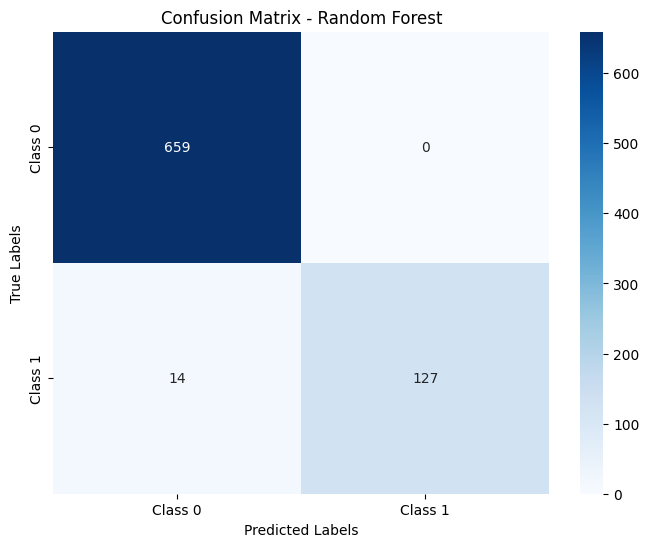

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       659
           1       1.00      0.90      0.95       141

    accuracy                           0.98       800
   macro avg       0.99      0.95      0.97       800
weighted avg       0.98      0.98      0.98       800



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your datasets (assuming you have already done this)
# demo = pd.read_sas('demo.XPT', format='xport', encoding='utf-8')
# glu = pd.read_sas('glu.XPT', format='xport', encoding='utf-8')

# Step 2: Prepare your data (this is just a placeholder, replace with your actual data preparation)
# merged_data = pd.merge(demo, glu[['SEQN', 'LBXGLU']], on='SEQN', how='inner')
# merged_data['diabetes_status'] = merged_data['LBXGLU'].apply(lambda x: 1 if x >= 115 else 0)
# X = ...  # Your feature set
# y = ...  # Your target variable

# Step 3: Split the data into training and testing sets (80:20 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 6: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Step 7: Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 8: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Without Recursive Feature Elimination

In [13]:
# Step 1: Set a new threshold
threshold = 0.3  # Example threshold

# Step 2: Make predictions based on the new threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Step 3: Calculate metrics again
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
sensitivity_adjusted = recall_score(y_test, y_pred_adjusted)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()
specificity_adjusted = tn / (tn + fp)
geometric_mean_adjusted = np.sqrt(sensitivity_adjusted * specificity_adjusted)
auc_adjusted = roc_auc_score(y_test, y_pred_proba)
mer_adjusted = 1 - accuracy_adjusted
mwc_adjusted = (fp + fn) / len(y_test)

# Step 4: Create a DataFrame to display the adjusted metrics
adjusted_metrics = {
    "Metric": [
        "Accuracy",
        "Precision",
        "Sensitivity (Recall)",
        "Specificity",
        "G.I. (Geometric Mean)",
        "AUC",
        "AUCH",
        "MER (Mean Error Rate)",
        "MWC (Mean Weighted Cost)"
    ],
    "Value": [
        accuracy_adjusted,
        precision_adjusted,
        sensitivity_adjusted,
        specificity_adjusted,
        geometric_mean_adjusted,
        auc_adjusted,
        auc_adjusted,  # AUCH is the same as AUC in this context
        mer_adjusted,
        mwc_adjusted
    ]
}

adjusted_metrics_df = pd.DataFrame(adjusted_metrics)

# Step 5: Display the adjusted metrics table
print(adjusted_metrics_df)

                     Metric  Value
0                  Accuracy    1.0
1                 Precision    1.0
2      Sensitivity (Recall)    1.0
3               Specificity    1.0
4     G.I. (Geometric Mean)    1.0
5                       AUC    1.0
6                      AUCH    1.0
7     MER (Mean Error Rate)    0.0
8  MWC (Mean Weighted Cost)    0.0


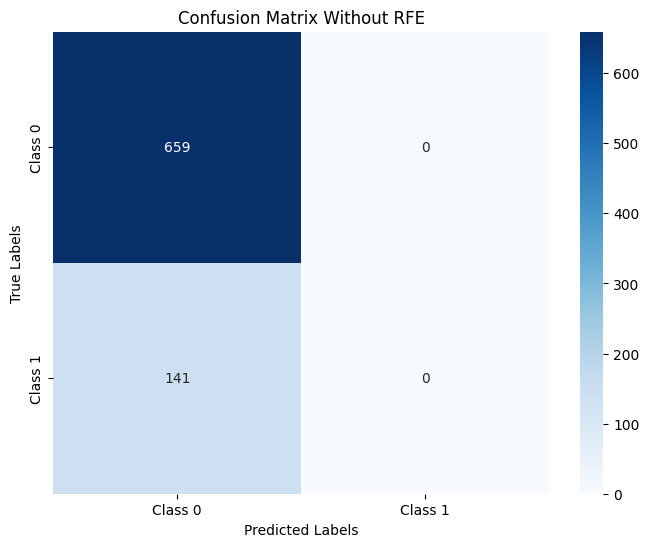

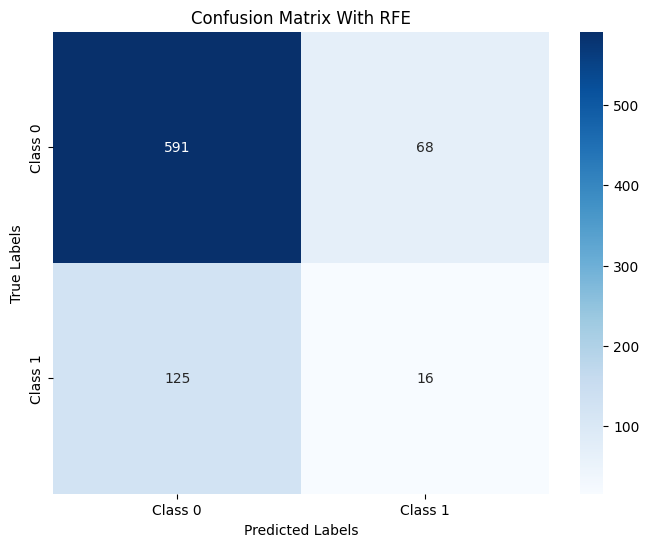

Classification Report Without RFE:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       659
           1       0.00      0.00      0.00       141

    accuracy                           0.82       800
   macro avg       0.41      0.50      0.45       800
weighted avg       0.68      0.82      0.74       800

Classification Report With RFE:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       659
           1       0.19      0.11      0.14       141

    accuracy                           0.76       800
   macro avg       0.51      0.51      0.50       800
weighted avg       0.71      0.76      0.73       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Assuming merged_data is your DataFrame and has been preprocessed
# Replace this with your actual data loading code
# merged_data = pd.read_csv('your_data.csv')  # Example of loading data

# Prepare features and target
X = merged_data.drop(columns=['SEQN', 'diabetes_status', 'LBXGLU'], errors='ignore')
y = merged_data['diabetes_status']

# Step 1: Drop columns with all missing values
X = X.dropna(axis=1, how='all')

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 4: Train the model without RFE
model_without_rfe = RandomForestClassifier(random_state=42)
model_without_rfe.fit(X_train, y_train)

# Step 5: Make predictions without RFE
y_pred_without_rfe = model_without_rfe.predict(X_test)

# Step 6: Calculate confusion matrix without RFE
conf_matrix_without_rfe = confusion_matrix(y_test, y_pred_without_rfe)

# Step 7: Train the model with RFE
# Initialize RFE with the model and specify the number of features to select
selector = RFE(estimator=LogisticRegression(max_iter=20000, solver='liblinear', random_state=42), n_features_to_select=10)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model with selected features
model_with_rfe = RandomForestClassifier(random_state=42)
model_with_rfe.fit(X_train_selected, y_train)

# Step 8: Make predictions with RFE
y_pred_with_rfe = model_with_rfe.predict(X_test_selected)

# Step 9: Calculate confusion matrix with RFE
conf_matrix_with_rfe = confusion_matrix(y_test, y_pred_with_rfe)

# Visualization of Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_without_rfe, "Confusion Matrix Without RFE")
plot_confusion_matrix(conf_matrix_with_rfe, "Confusion Matrix With RFE")

# Optional: Display classification reports for both models
print("Classification Report Without RFE:")
print(classification_report(y_test, y_pred_without_rfe))

print("Classification Report With RFE:")
print(classification_report(y_test, y_pred_with_rfe))

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Define the path to save the model in Google Drive
model_filename = '/content/drive/MyDrive/Random Forest/model.pkl'

# Assuming 'rf_model' is the trained model you want to save
# Replace 'rf_model' with the correct variable name if different
model = rf_model  # Assign the trained model to the variable 'model'

# Save the model to Google Drive
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to /content/drive/MyDrive/Random Forest/model.pkl


With Recursive Feature Elimination

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

# Assuming you already have your raw data (X_train, X_test, y_train, y_test)

# Step 1: Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to the test set

# Step 2: Train the Random Forest model
rf_model_no_rfe = RandomForestClassifier()

# Fit the model on the training data
rf_model_no_rfe.fit(X_train_scaled, y_train)

# Step 3: Set a new threshold for prediction
threshold = 0.3  # Example threshold

# Step 4: Make predictions using the model's predicted probabilities (without RFE)
y_pred_proba_no_rfe = rf_model_no_rfe.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# Step 5: Make adjusted predictions using the new threshold
y_pred_adjusted_no_rfe = (y_pred_proba_no_rfe >= threshold).astype(int)

# Step 6: Calculate metrics based on adjusted predictions
accuracy_adjusted_no_rfe = accuracy_score(y_test, y_pred_adjusted_no_rfe)
precision_adjusted_no_rfe = precision_score(y_test, y_pred_adjusted_no_rfe)
sensitivity_adjusted_no_rfe = recall_score(y_test, y_pred_adjusted_no_rfe)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted_no_rfe).ravel()
specificity_adjusted_no_rfe = tn / (tn + fp)
geometric_mean_adjusted_no_rfe = np.sqrt(sensitivity_adjusted_no_rfe * specificity_adjusted_no_rfe)
auc_adjusted_no_rfe = roc_auc_score(y_test, y_pred_proba_no_rfe)
mer_adjusted_no_rfe = 1 - accuracy_adjusted_no_rfe
mwc_adjusted_no_rfe = (fp + fn) / len(y_test)

# Step 7: Create a DataFrame to display the adjusted metrics for the model
adjusted_metrics_no_rfe = {
    "Metric": [
        "Accuracy",
        "Precision",
        "Sensitivity (Recall)",
        "Specificity",
        "G.I. (Geometric Mean)",
        "AUC",
        "AUCH",
        "MER (Mean Error Rate)",
        "MWC (Mean Weighted Cost)"
    ],
    "Value": [
        accuracy_adjusted_no_rfe,
        precision_adjusted_no_rfe,
        sensitivity_adjusted_no_rfe,
        specificity_adjusted_no_rfe,
        geometric_mean_adjusted_no_rfe,
        auc_adjusted_no_rfe,
        auc_adjusted_no_rfe,  # AUCH is the same as AUC in this context
        mer_adjusted_no_rfe,
        mwc_adjusted_no_rfe
    ]
}

adjusted_metrics_no_rfe_df = pd.DataFrame(adjusted_metrics_no_rfe)

# Step 8: Display the adjusted metrics table
print(adjusted_metrics_no_rfe_df)


                     Metric     Value
0                  Accuracy  0.788750
1                 Precision  0.240741
2      Sensitivity (Recall)  0.092199
3               Specificity  0.937785
4     G.I. (Geometric Mean)  0.294045
5                       AUC  0.594975
6                      AUCH  0.594975
7     MER (Mean Error Rate)  0.211250
8  MWC (Mean Weighted Cost)  0.211250


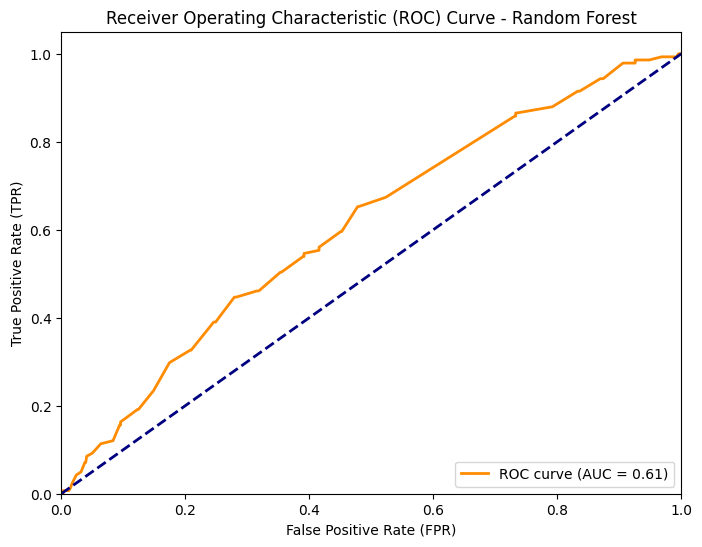

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already preprocessed data: X_train, X_test, y_train, y_test
# Scaling the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Get predicted probabilities for the positive class (class 1)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Step 3: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 4: Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Step 5: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import pandas as pd
import joblib
import gradio as gr

# Load the best model
model_file_map = {

    "Random Forest": "model.pkl",

}

# Specify the desired model here
best_model_filename = model_file_map['Random Forest']
best_model = joblib.load(f"/content/drive/MyDrive/Random Forest/model.pkl")

# Preprocessing function
def preprocess(data):
    """
    Preprocess the input data to match the model's training requirements.
    Modify based on your dataset and model needs.
    """
    # Handle missing values
    data = data.fillna(0)  # Replace missing values with 0 (adjust as needed)

    # Ensure numeric columns are properly formatted
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric where possible
    data = data.fillna(0)  # Handle non-convertible values

    return data

# Function to process the uploaded CSV file and predict
def process_and_predict(file):
    try:
        # Load the CSV file
        data = pd.read_csv(file.name)
    except Exception as e:
        return f"Error reading the CSV file: {e}"

    # Display initial file structure for debugging
    print("CSV File Preview:")
    print(data.head())

    # Ensure proper column structure
    try:
        data = preprocess(data)
    except Exception as e:
        return f"Error during preprocessing: {e}"

    # Ensure the model can predict using the processed data
    try:
        predictions = best_model.predict(data)
    except Exception as e:
        return f"Error during prediction: {e}"

    # Convert predictions to labels
    labels = ["Non-Diabetic" if pred == 0 else "Diabetic" for pred in predictions]

    return pd.DataFrame({"Prediction": predictions, "Label": labels}).to_string(index=False)

# Define the Gradio interface
interface = gr.Interface(
    fn=process_and_predict,
    inputs=gr.File(label="Upload CSV File"),
    outputs=gr.Textbox(label="Predictions"),
    title="Diabetes Prediction",
    description="Upload a CSV file to predict whether the individual is Non-Diabetic (0) or Diabetic (1).",
)

# Launch the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cd3b0e0f8945c27395.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
